In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print("DataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nMissing Values:")
df.isnull().sum()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Descriptive Statistics:

Missing Values:


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


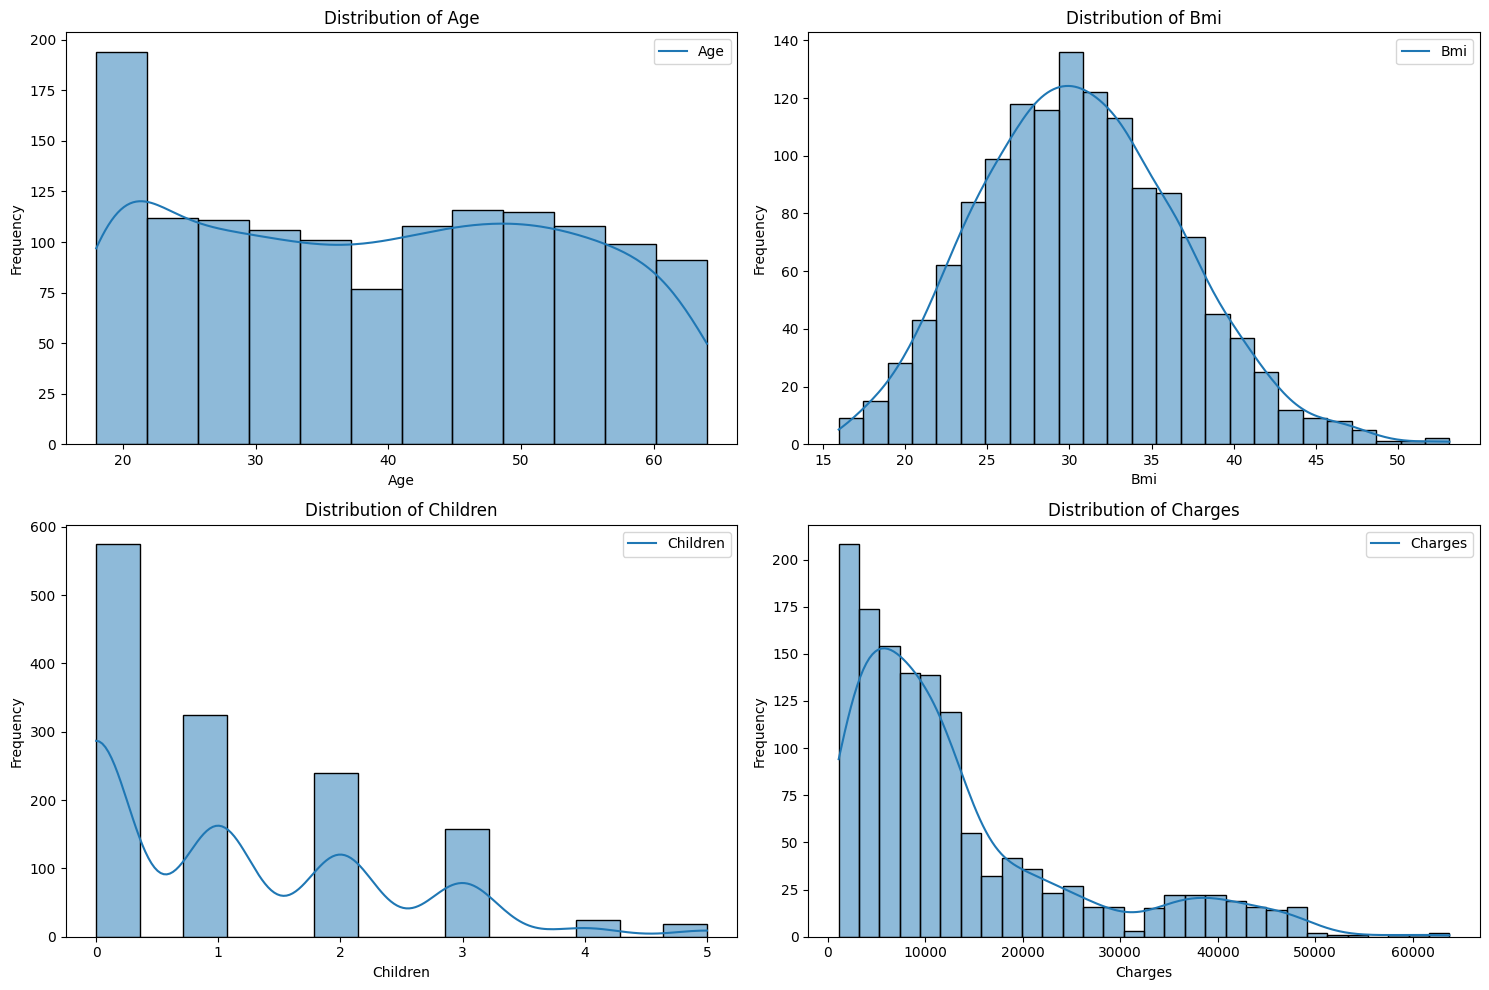

In [4]:
numerical_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, legend=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.legend(labels=[col.capitalize()])
plt.tight_layout()
plt.show()

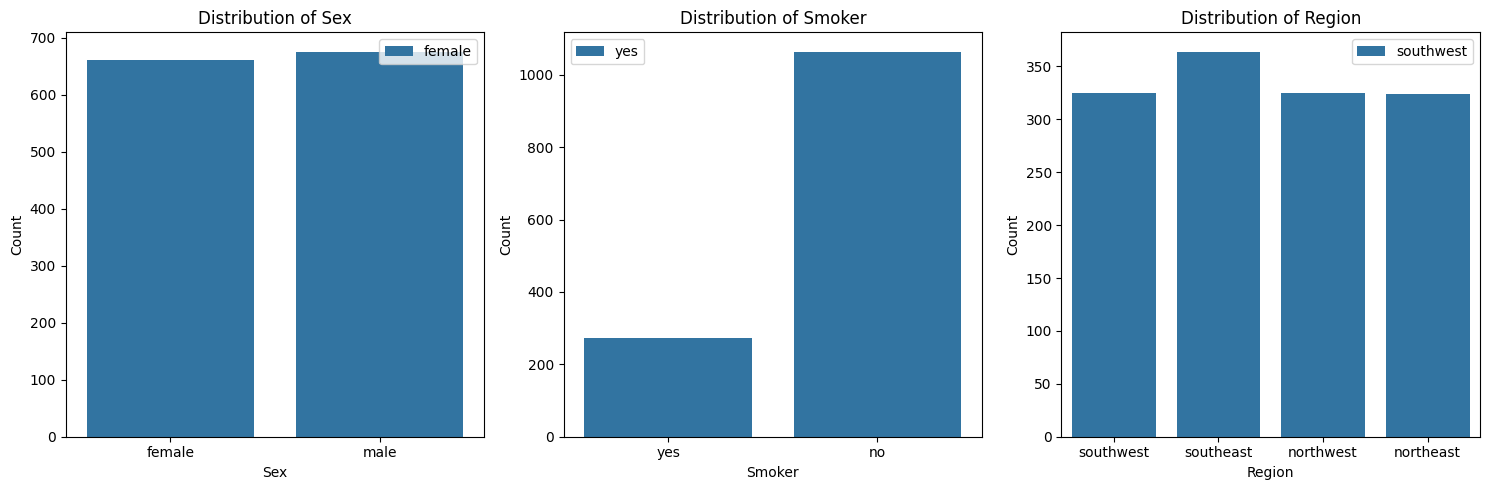

In [5]:
categorical_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], legend=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(labels=df[col].unique())
plt.tight_layout()
plt.show()

/tmp/ipython-input-871573561.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


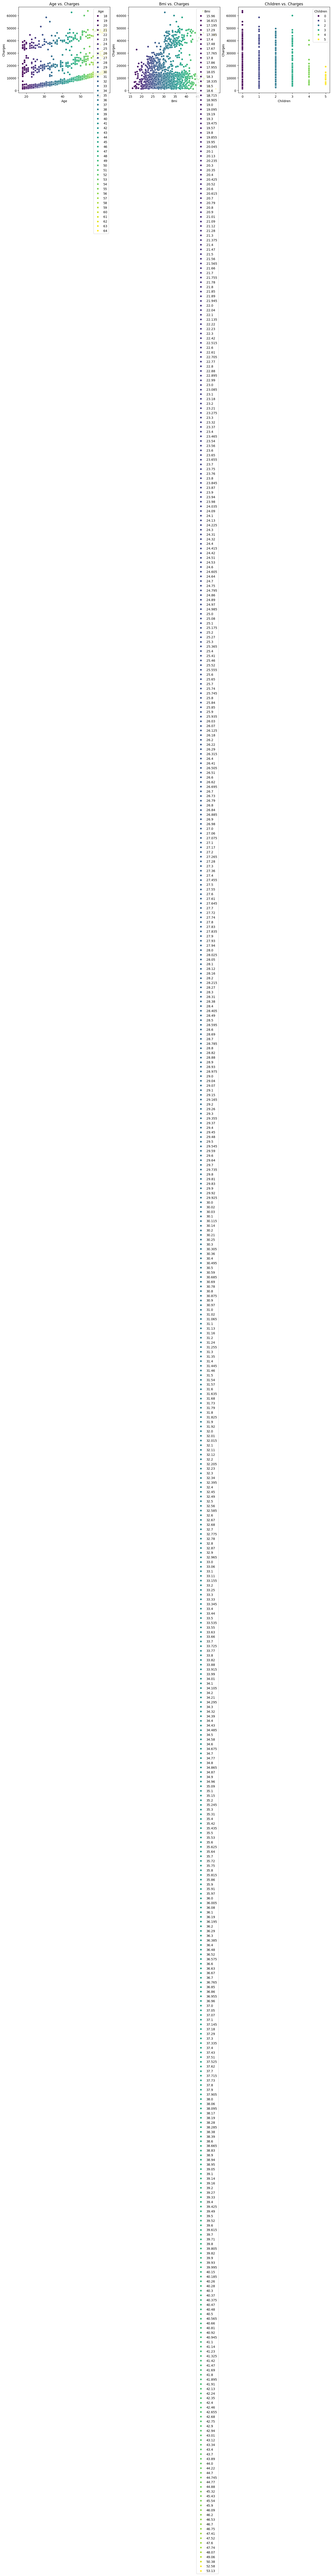

In [6]:
numerical_features = ['age', 'bmi', 'children']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['charges'], hue=df[col], palette='viridis', legend='full')
    plt.title(f'{col.capitalize()} vs. Charges')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.legend(title=col.capitalize())
plt.tight_layout()
plt.show()

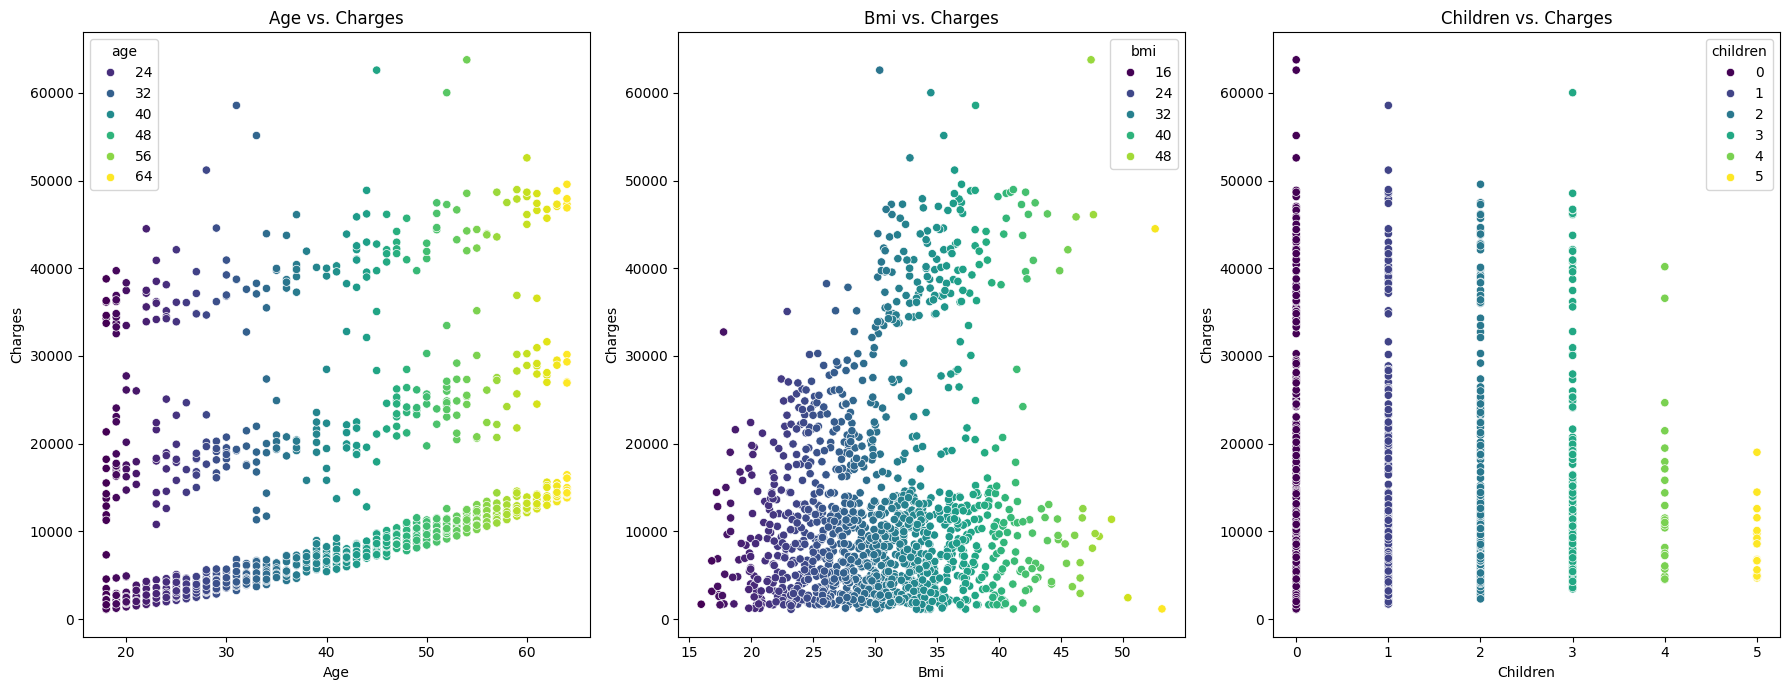

In [7]:
numerical_features = ['age', 'bmi', 'children']

plt.figure(figsize=(18, 7)) # Increased height for better layout
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    # Removed legend='full' to allow seaborn to automatically generate a colorbar for numerical hue
    sns.scatterplot(x=df[col], y=df['charges'], hue=df[col], palette='viridis')
    plt.title(f'{col.capitalize()} vs. Charges')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    # Removed explicit plt.legend() as seaborn handles the legend (colorbar) with hue
plt.tight_layout()
plt.show()

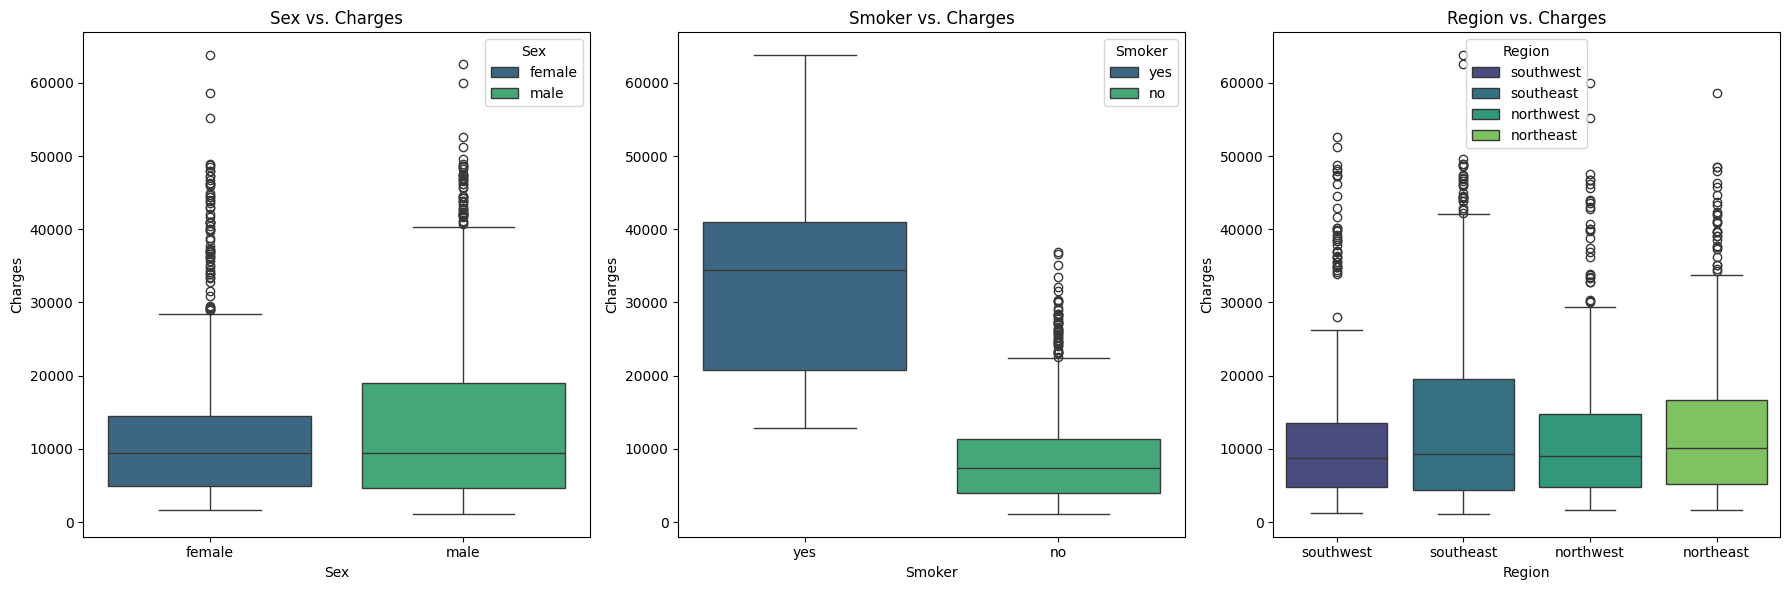

In [8]:
categorical_features = ['sex', 'smoker', 'region']

plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['charges'], hue=df[col], palette='viridis', legend='full')
    plt.title(f'{col.capitalize()} vs. Charges')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.legend(title=col.capitalize())
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print("Libraries OneHotEncoder and StandardScaler imported successfully.")

Libraries OneHotEncoder and StandardScaler imported successfully.


In [10]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame and drop original categorical columns
df_processed = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("Categorical features successfully one-hot encoded and original columns dropped.")

Categorical features successfully one-hot encoded and original columns dropped.


In [11]:
print("Missing Values after One-Hot Encoding:")
df_processed.isnull().sum()

Missing Values after One-Hot Encoding:


,0
age,0
bmi,0
children,0
charges,0
sex_female,0
sex_male,0
smoker_no,0
smoker_yes,0
region_northeast,0
region_northwest,0


In [12]:
numerical_cols_to_scale = ['age', 'bmi', 'children']

scaler = StandardScaler()
df_processed[numerical_cols_to_scale] = scaler.fit_transform(df_processed[numerical_cols_to_scale])

print("Numerical features successfully scaled.")

Numerical features successfully scaled.


In [13]:
print("Processed DataFrame Head:")
df_processed.head()

Processed DataFrame Head:


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("Libraries train_test_split and LinearRegression imported successfully.")

Libraries train_test_split and LinearRegression imported successfully.


In [15]:
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Data split into training and testing sets successfully.")
print("Linear Regression model initialized and trained successfully.")

Data split into training and testing sets successfully.
Linear Regression model initialized and trained successfully.


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("Model predictions on the test set generated successfully.")

Model predictions on the test set generated successfully.


Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2): 0.78


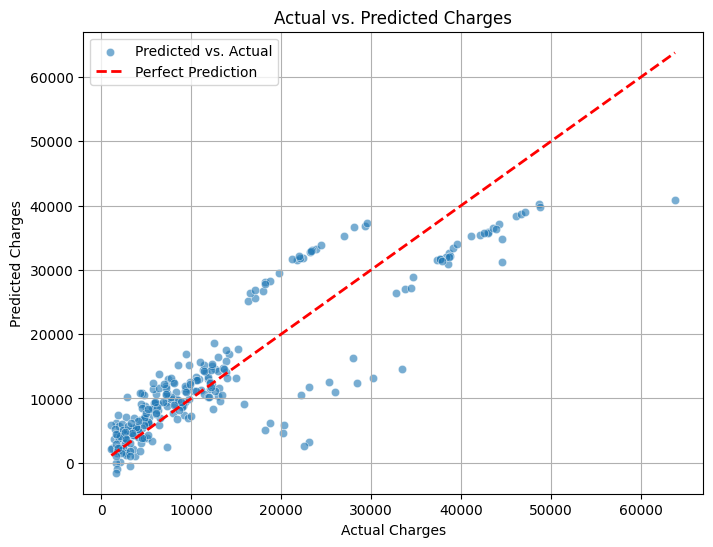

In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
coefficients = pd.Series(model.coef_, index=X.columns)
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

print("Coefficients sorted by absolute value (most impactful first):\n")
print(coefficients[sorted_coefficients.index])

Coefficients sorted by absolute value (most impactful first):

smoker_no          -11825.564428
smoker_yes          11825.564428
age                  3609.149018
bmi                  2054.885063
children              512.478869
region_northeast      459.585244
region_southwest     -350.214110
region_southeast     -198.279052
region_northwest       88.907918
sex_female              9.295846
sex_male               -9.295846
dtype: float64
